# Plotting results of Lyapunov functions

In [1]:
import numpy as np
from numpy import *
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
def Plot3D(X, Y, V, r):
    # Plot Lyapunov functions  
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X,Y,V, rstride=5, cstride=5, alpha=0.5, cmap=cm.coolwarm)
    ax.contour(X,Y,V,10, zdir='z', offset=0, cmap=cm.coolwarm)
    
    # Plot Valid region computed by dReal
    theta = np.linspace(0,2*np.pi,50)
    xc = r*cos(theta)
    yc = r*sin(theta)
    ax.plot(xc[:],yc[:],'r',linestyle='--', linewidth=2 ,label='Valid region')
    plt.legend(loc='upper right')
    return ax

def Plotflow(Xd, Yd, t):
    # Plot phase plane 
    DX, DY = f([Xd, Yd],t)
    plt.streamplot(Xd,Yd,DX,DY, color=('gray'), linewidth=0.5,
                  density=0.8, arrowstyle='-|>', arrowsize=1)

In [3]:
def levelset(x1,x2,V,r):
    N_level = 1000
    cs = plt.contour(x1,x2,V,N_level)
    for i in range(len(cs.levels)-2):
        elements = cs.allsegs[i+1][0]
        elements_sq = np.sum(elements**2,axis = 1)
        if r**2 - np.max(elements_sq) < 1e-6:
            c = cs.levels[i]
            break
    return c
    

## Van der Pol

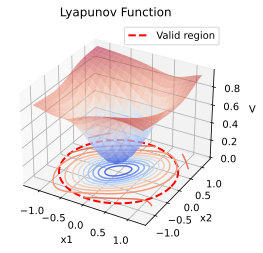

In [4]:
# learned dynamics
r = 1.2
X = np.linspace(-1.2, 1.2, 100) 
Y = np.linspace(-1.2, 1.2, 100)
x1, x2 = np.meshgrid(X,Y)
# beta = 0.02
V = tanh((0.51641756296157837 + 0.75732171535491943 * tanh((-1.6187947988510132 + 2.0125248432159424 * x1 - 0.86828583478927612 * x2)) - 1.6154271364212036 * tanh((-1.0764049291610718 + 0.26035198569297791 * x1 - 0.058430317789316177 * x2)) + 1.2375599145889282 * tanh((-0.96464759111404419 - 0.50644028186798096 * x1 + 1.4162489175796509 * x2)) + 0.41873458027839661 * tanh((-0.82901746034622192 + 2.5682404041290283 * x1 - 1.2206004858016968 * x2)) - 0.89795422554016113 * tanh((0.98988056182861328 + 0.83175277709960938 * x1 + 1.0546237230300903 * x2)) + 1.0879759788513184 * tanh((1.1398535966873169 - 0.2350536435842514 * x1 + 0.075554989278316498 * x2)))) 

c = levelset(x1,x2,V,r)

ax = Plot3D(x1,x2,V,1.2)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('V')
plt.title('Lyapunov Function')
plt.savefig('vdp_lf.png', dpi=500, bbox_inches='tight')
plt.show()

### Comparison with actual dynamics and LQR

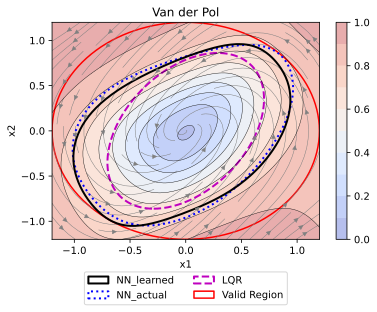

In [6]:
def f(y,t):
    x1,x2 = y
    dydt = [-x2,
            x1+(x1**2-1)*x2]
    return dydt

ax = plt.gca()

# Lyapunov functions 
V_lqr = 1.5*x1**2-x1*x2+x2**2
V_acutal = tanh((0.55936360359191895 + 1.3911000490188599 * tanh((-1.2856053113937378 + 1.9734891653060913 * x1 - 1.1179620027542114 * x2)) - 1.6470109224319458 * tanh((-1.1790347099304199 + 0.12229307740926743 * x1 + 0.023527547717094421 * x2)) + 1.5415596961975098 * tanh((-0.95915126800537109 - 0.40343287587165833 * x1 + 1.5067094564437866 * x2)) + 0.6826709508895874 * tanh((0.89481496810913086 - 0.05955226719379425 * x1 + 0.028606858104467392 * x2)) + 1.1617172956466675 * tanh((1.1949435472488403 - 0.18072269856929779 * x1 - 0.050765510648488998 * x2)) - 1.253376841545105 * tanh((1.2111023664474487 + 1.1277693510055542 * x1 + 0.94527208805084229 * x2)))) 


# Vaild Region
C = plt.Circle((0, 0),1.2, color='r', linewidth=1.5, fill=False, label='ROA')
ax.add_artist(C)

# plot direction field
xd = np.linspace(-1.2, 1.2, 100) 
yd = np.linspace(-1.2, 1.2, 100)
Xd, Yd = np.meshgrid(xd,yd)
t = np.linspace(0,2,100)
Plotflow(Xd, Yd, t) 

ax.contour(x1,x2,V_lqr-0.618,0,linewidths=2, colors='m',linestyles='--')
ax.contour(x1,x2,V_acutal-0.838,0,linewidths=2, colors='b',linestyles=':')
ax.contour(x1,x2,V-c,0,linewidths=2, colors='k')

ax.contour(x1,x2,V,8,linewidths=0.4, colors='k')
c1 = ax.contourf(x1,x2,V,8, alpha=0.4,cmap=cm.coolwarm)
plt.colorbar(c1)

plt.title('Region of Attraction')
plt.title('Van der Pol')

plt.legend([plt.Rectangle((0,0),1,2,color='k',fill=False,linewidth = 2),plt.Rectangle((0,0),1,2,color='b',fill=False,linewidth = 2,linestyle=':'),plt.Rectangle((0,0),1,2,color='m',fill=False,linewidth = 2,linestyle='--'),C],['NN_learned','NN_actual','LQR','Valid Region'], bbox_to_anchor=(0.88, -0.15), loc=0, borderaxespad=0, ncol = 2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig('vdp_roa.png', dpi=500, bbox_inches='tight')
plt.show()


## Circle path following ( kinematic unicycle model )

### Unknown dynamics: Circle path following ( kinematic unicycle model )

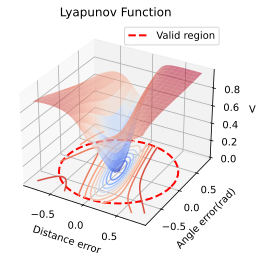

In [10]:
r = 0.8
x = np.linspace(-r, r, 100)
y = np.linspace(-r, r, 100)
x1, x2 = np.meshgrid(x,y)

# tuning
V = tanh((0.59095233678817749 - 1.2369513511657715 * tanh((-1.9072647094726562 - 2.1378724575042725 * x1 + 1.0794919729232788 * x2)) + 1.4756215810775757 * tanh((-0.79773855209350586 + 4.9804959297180176 * x1 + 0.11680498719215393 * x2)) - 2.1383264064788818 * tanh((0.18891614675521851 + 2.8365912437438965 * x1 + 0.69793730974197388 * x2)) - 0.76876986026763916 * tanh((0.73854517936706543 - 3.338552713394165 * x1 - 2.2363924980163574 * x2)) + 1.0839570760726929 * tanh((0.87543833255767822 - 0.027711296454071999 * x1 - 0.25035503506660461 * x2)) - 0.84737318754196167 * tanh((1.0984361171722412 + 0.61321312189102173 * x1 - 1.6286146640777588 * x2)))) 

c_pf = levelset(x1,x2,V,r)

# Lyapunov functions 
V_lqr = 1.3536 *x1**2 + 2*0.3536*x1*x2 + 0.3536*x2**2

c_lqr = levelset(x1,x2,V_lqr,np.pi/9)

ax = Plot3D(x1,x2,V,r)
ax.set_xlabel('Distance error')
ax.set_ylabel('Angle error(rad)')
ax.set_zlabel('V')
plt.title('Lyapunov Function')

plt.show()


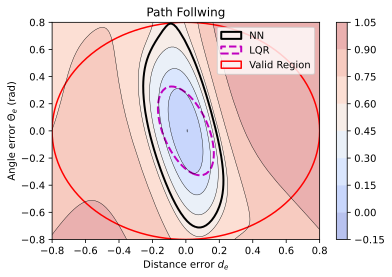

In [13]:
def f(y,t):
    v = 1
    Ku = np.matrix([-5.9553876, -4.0342584])  
    b = np.matrix([0.1974])
    x1,x2 = y
    u = 5*np.tan(Ku.item(0)*x1 + Ku.item(1)*x2 + b)
    dydt = [v*np.sin(x2),
            u - v*np.cos(x2)/(1-x1)]
    return dydt


ax = plt.gca()


# Vaild Region
C = plt.Circle((0, 0),r, color='r', linewidth=1.5, fill=False, label='ROA')
ax.add_artist(C)

# plot direction field
xd = np.linspace(-r, r, 100) 
yd = np.linspace(-r, r, 100)
Xd, Yd = np.meshgrid(xd,yd)

ax.contour(x1,x2,V_lqr-c_lqr,0,linewidths=2, colors='m',linestyles='--')
ax.contour(x1,x2,V-c_pf,0,linewidths=2, colors='k')  
ax.contour(x1,x2,V,8,linewidths=0.4, colors='k')
c1 = ax.contourf(x1,x2,V,8, alpha=0.4,cmap=cm.coolwarm)
plt.colorbar(c1)

# plt.title('Region of Attraction')
plt.title('Path Follwing')
plt.legend([plt.Rectangle((0,0),1,2,color='k',fill=False,linewidth = 2),plt.Rectangle((0,0),1,2,color='m',fill=False,linewidth = 2,linestyle='--'),C],['NN','LQR','Valid Region'],loc='upper right')
plt.xlabel('Distance error $d_e$')
plt.ylabel('Angle error $\Theta_e$ (rad)')
plt.savefig('pf_roa.png', dpi=500, bbox_inches='tight')
plt.show()

## Inverted Pendulum

### Unknown dynamics with nonlinear controller

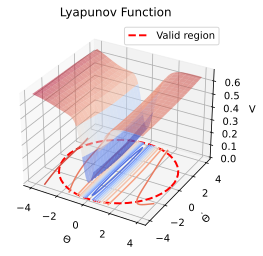

In [ ]:
X = np.linspace(-4, 4, 100) 
Y = np.linspace(-4, 4, 100)
x1, x2 = np.meshgrid(X,Y)
# Lyapunov functions
# 0.029
V = tanh((0.22031795978546143 + 0.23062203824520111 * tanh((-0.8725285530090332 - 0.39924818277359009 * x1 - 0.10677531361579895 * x2)) - 0.33862197399139404 * tanh((-0.48061129450798035 + 0.033309374004602432 * x1 - 0.031128710135817528 * x2)) + 0.66825199127197266 * tanh((-0.26618844270706177 + 0.95374882221221924 * x1 + 0.012976933270692825 * x2)) - 0.048023782670497894 * tanh((0.81865900754928589 + 0.12884798645973206 * x1 - 0.322447270154953 * x2)) - 0.52606570720672607 * tanh((0.86447733640670776 + 2.1256422996520996 * x1 + 0.023544158786535263 * x2)) + 0.65177470445632935 * tanh((0.88047617673873901 + 0.034666787832975388 * x1 - 0.018918223679065704 * x2))))

V_lqr = 85.5250*x1**2 + 2*14.1518*x1*x2 + 2.4269*x2**2 

ax = Plot3D(x1,x2,V,4)
ax.set_xlabel('$\Theta$')
ax.set_ylabel('$\dot{\Theta}$')
ax.set_zlabel('V')
plt.title('Lyapunov Function')
plt.show()

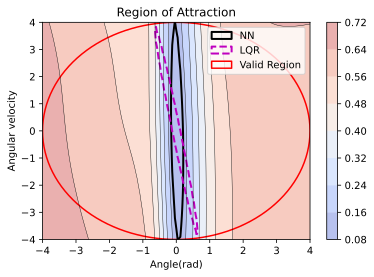

In [ ]:
def f(y,t) :
    #parameters
    G = 9.81 
    L = 0.5  
    m = 0.15  
    b = 0.1   
    x1,x2 = y    
    Ku = np.matrix([[-23.286324,  -5.270551]])
    u = (Ku.item(0)*x1 + Ku.item(1)*x2)
    dydt =[x2,  (m*G*L*sin(x1) + u - b*x2) / (m*L**2)]
    return dydt

ax = plt.gca()

# Vaild Region
C = plt.Circle((0, 0),4, color='r', linewidth=1.5, fill=False)
ax.add_artist(C)

# plot direction field
xd = np.linspace(-4, 4, 100) 
yd = np.linspace(-4, 4, 100)
Xd, Yd = np.meshgrid(xd,yd)

ax.contour(X,Y,V-0.126,0,linewidths=2, colors='k')
ax.contour(X,Y,V_lqr-1.32,0,linewidths=2, colors='m',linestyles='--')


ax.contour(x1,x2,V,8,linewidths=0.4, colors='k')
c1 = ax.contourf(x1,x2,V,8,alpha=0.4,cmap=cm.coolwarm)
plt.colorbar(c1)

plt.title('Region of Attraction')
plt.legend([plt.Rectangle((0,0),1,2,color='k',fill=False,linewidth = 2),plt.Rectangle((0,0),1,2,color='m',fill=False,linewidth = 2,linestyle='--'),C]\
           ,['NN','LQR','Valid Region'],loc='upper right')

plt.xlabel('Angle(rad)')
plt.ylabel('Angular velocity')
plt.savefig('ip_roa.png', dpi=500, bbox_inches='tight')
plt.show()